In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
pd.set_option('max_rows', 5)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [3]:
data = loadmat('ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [4]:
X, y = data['X'], data['y']
X_test, y_test = data['Xtest'], data['ytest']
X_val, y_val = data['Xval'], data['yval']
X_val

array([[-16.74653578],
       [-14.57747075],
       [ 34.51575866],
       [-47.01007574],
       [ 36.97511905],
       [-40.68611002],
       [ -4.47201098],
       [ 26.53363489],
       [-42.7976831 ],
       [ 25.37409938],
       [-31.10955398],
       [ 27.31176864],
       [ -3.26386201],
       [ -1.81827649],
       [-40.7196624 ],
       [-50.01324365],
       [-17.41177155],
       [  3.5881937 ],
       [  7.08548026],
       [ 46.28236902],
       [ 14.61228909]])

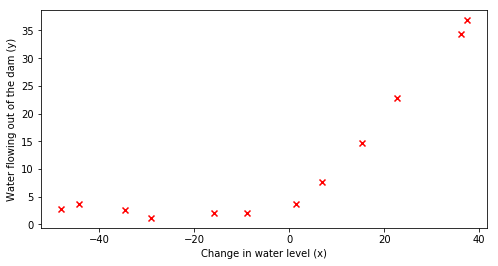

In [5]:
plt.scatter(x=X, y=y, marker='x', c='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [6]:
m, n = X.shape
theta = [1, 1]
lmbda = 1
theta

[1, 1]

In [7]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [15]:
X_test = np.insert(X_test, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)

In [9]:
def h(X, theta):
    """ hypothesis function """
    return np.dot(X, theta)

In [25]:
def costFunction(theta, X, y, m, lmbda):
    hypothesis = h(X, theta).reshape((m, 1))
    J = float(1/(2*m) * np.dot((hypothesis - y).T, (hypothesis - y)))
    regularization = lmbda/(2*m) * np.dot(theta[1:], theta[1:])
    
    
    return J + regularization

costFunction(theta, X, y, m, lmbda)

303.9931922202643

In [13]:
#expected cost 303.993
costFunction(theta, X, y, m, lmbda)

7279.880289808604